In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Mas ricos 

In [2]:
data =requests.get("https://forbes.co/2021/04/09/editors-picks/los-50-mas-ricos-del-mundo-2021/")
soup = BeautifulSoup(data.content, "lxml")

In [3]:
names= [x.text for x in soup.select("h2")][1:17]
fortuna= [x.text.replace('Fortuna: ',"").replace('US','') for x in soup.select("figure.wp-block-image + *")][:16]
pais= [x.text.replace('País: ',"") for x in soup.select("figure.wp-block-image + * + *")][:16]
dinero= [x.text.replace('Fortuna: US$',"").replace(' millones',"") for x in soup.select("figure.wp-block-image + *")][:16]
dinero= [float(x) for x in dinero]

In [4]:
PDF= pd.DataFrame({'nombres':names, 'fortuna (USD)':fortuna, 'pais':pais})
PDF

,nombres,fortuna (USD),pais
0,1. Jeff Bezos,$177.000 millones,Estados Unidos
1,2. Elon Musk,$151.000 millones,Estados Unidos.
2,3. Bernard Arnault y familia,$150.000 millones,Francia
3,4. Bill Gates,$124.000 millones,Estados Unidos
4,5. Mark Zuckerberg,$97.000 millones,Estados Unidos.
5,6. Warren Buffett,$96.000 millones,Estados Unidos.
6,7. Larry Ellison,$93.000 millones,Estados Unidos.
7,8. Larry Page,$91.500 millones,Estados Unidos.
8,9. Sergey Brin,$89.000 millones,Estados Unidos.
9,10. Mukesh Ambani,$84.500 millones,India.


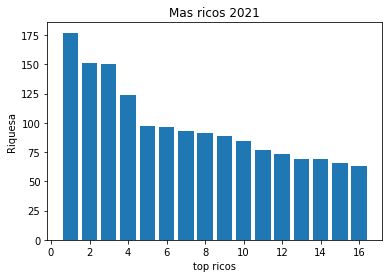

In [5]:
posiciones= [x for x in range(1,len(names)+1)]
plt.bar(posiciones,dinero)
plt.title("Mas ricos 2021")
plt.xlabel("top ricos")
plt.ylabel("Riquesa")
plt.savefig("Plot mas ricos 2021.jpg")

# JOBS

In [6]:
#Steve Jobs murio teniendo un patrimonio de $8300 millones de dólares
#patrimonio neto cuando murio - precio de acciones apple - precio acciones disney
Jobs= 8300 - 286.74 -  7400
#tenia un total de 5.5 millones de acciones apple y 138 millones de acciones disney

In [7]:
driver = webdriver.Chrome()
driver.get("https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch")
content = driver.page_source
soup = BeautifulSoup(content)

In [8]:
accionapple= [x.text for x in soup.select("div[class='D(ib) Va(m) Maw(65%) Ov(h)'] > * > * ")][0]
accionapple

'174.33'

In [9]:
driver.get("https://finance.yahoo.com/quote/DIS?p=DIS&.tsrc=fin-srch")
content = driver.page_source
soup = BeautifulSoup(content)

In [10]:
acciondisney= [x.text for x in soup.select("div[class='D(ib) Va(m) Maw(65%) Ov(h)'] > * > * ")][0]
#disneyUSD= float(acciondisney[0]) * 20
acciondisney

'149.10'

In [11]:
TotalJobs= Jobs + (float(accionapple) * 5500000) + (float(acciondisney) * 138000000)
format(int(TotalJobs), ',d')

'21,534,615,613'

# Acciones

In [12]:
AAPL = pd.read_csv("AAPL.csv", header=None)
AAPL

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,1985-01-01,0.130022,0.138951,0.124442,0.129464,0.101327,6366416000
2,1985-02-01,0.129464,0.137277,0.110491,0.110491,0.086477,4733388800
3,1985-03-01,0.110491,0.116071,0.092634,0.098772,0.077305,4615587200
4,1985-04-01,0.098772,0.102679,0.087612,0.094866,0.074248,2868028800
...,...,...,...,...,...,...,...
440,2021-08-01,146.360001,153.490005,144.500000,151.830002,151.381927,1460744100
441,2021-09-01,152.830002,157.259995,141.270004,141.500000,141.293793,1797465800
442,2021-10-01,141.899994,153.169998,138.270004,149.800003,149.581696,1564866800
443,2021-11-01,148.990005,165.699997,147.479996,165.300003,165.059113,1690808300


In [13]:
fechas= [x.replace("-01-01","") for x in AAPL[0][1::12]]
precio= [float(x) for x in AAPL[2][1::12]]

In [14]:
print(fechas)
print(precio)

['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
[0.138951, 0.110491, 0.25558, 0.412946, 0.392857, 0.345982, 0.5, 0.616071, 0.582589, 0.314732, 0.429129, 0.316964, 0.198661, 0.178571, 0.422433, 1.084821, 0.401786, 0.441607, 0.274643, 0.443571, 1.390893, 3.085714, 3.492857, 7.152143, 3.470357, 7.699643, 12.45, 16.365713, 19.821428, 20.007143, 30.0, 26.4625, 30.610001, 45.025002, 42.25, 81.962502, 145.089996]


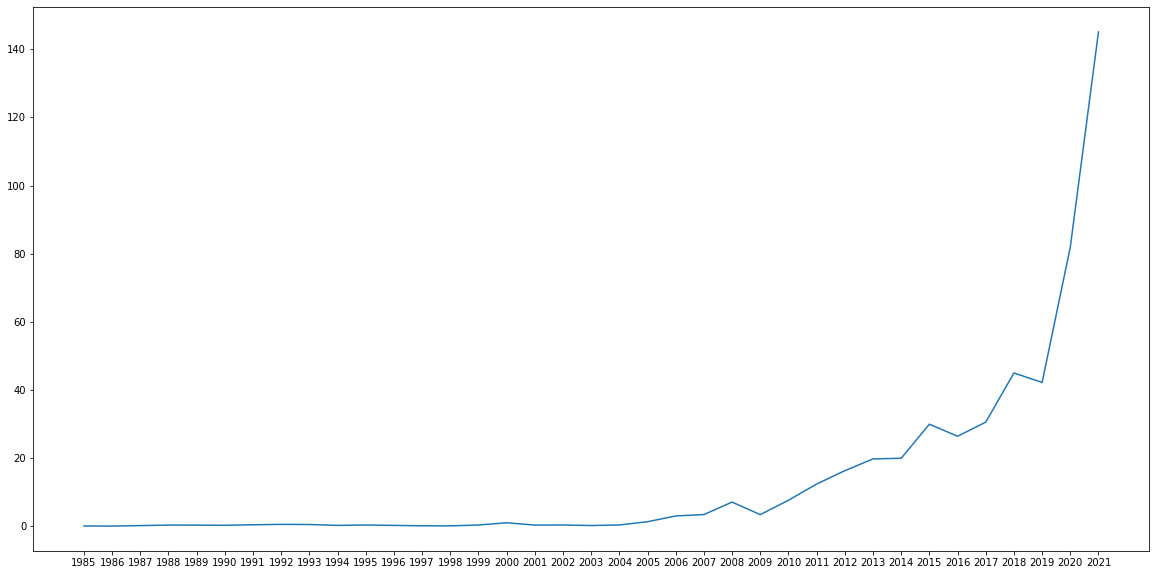

<Figure size 1440x720 with 0 Axes>

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(fechas,precio)
plt.show()
plt.savefig("acciones_apple.jpg")

# Disney

Disney comrpó a pixar en el 2006

In [16]:
DIS = pd.read_csv("DIS.csv", header=None)
DIS

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,1985-01-01,1.233125,1.543975,1.217711,1.528561,1.081137,278059404
2,1985-02-01,1.528561,1.667288,1.502871,1.600493,1.132013,138915358
3,1985-03-01,1.600493,1.649305,1.513147,1.618477,1.144733,101605272
4,1985-04-01,1.608201,1.654443,1.564527,1.574803,1.118192,68255854
...,...,...,...,...,...,...,...
440,2021-08-01,177.220001,187.580002,170.919998,181.300003,181.300003,180739200
441,2021-09-01,181.960007,187.580002,169.029999,169.169998,169.169998,183732800
442,2021-10-01,172.279999,179.630005,168.149994,169.070007,169.070007,181065900
443,2021-11-01,169.210007,179.250000,143.110001,144.899994,144.899994,349346700


In [17]:
fechasD= [x.replace("-01-01","") for x in DIS[0][1::12]]
precioD= [float(x) for x in DIS[2][1::12]]

In [18]:
print(fechasD)
print(precioD)

['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
[1.543975, 2.553596, 4.685875, 5.364094, 6.175901, 9.680031, 8.940156, 11.766068, 15.331854, 15.907313, 16.893812, 21.168646, 24.580292, 35.637314, 38.165218, 37.487, 33.541, 23.281401, 18.289709, 24.741421, 28.549311, 26.14225, 35.484406, 32.630001, 24.83, 32.75, 40.0, 40.25, 54.869999, 76.839996, 96.43, 103.43, 111.050003, 113.190002, 113.18, 148.199997, 182.589996]


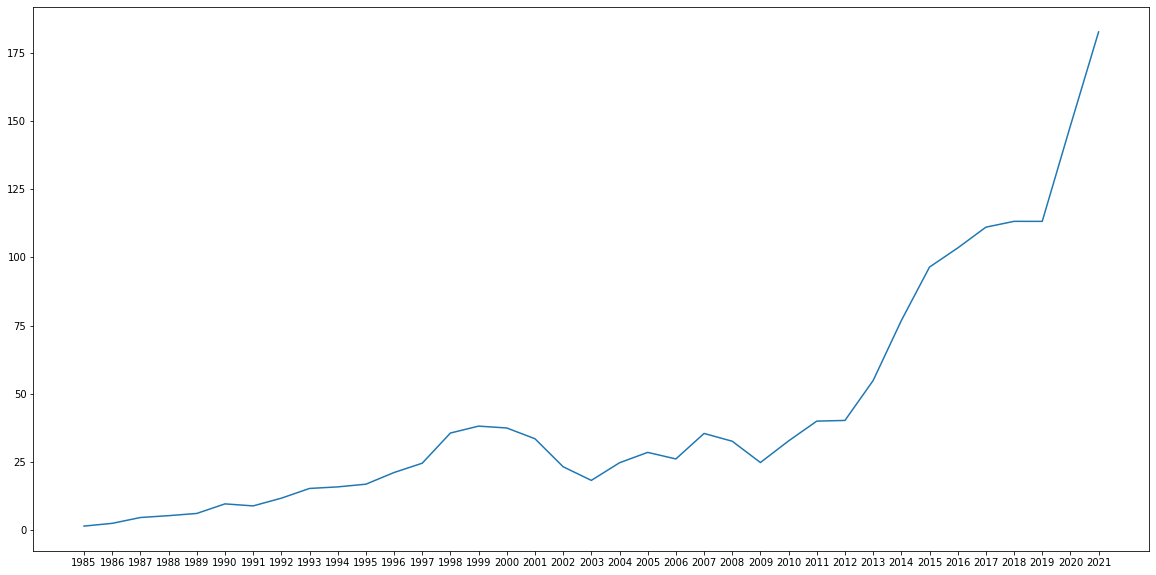

<Figure size 1440x720 with 0 Axes>

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(fechasD,precioD)
plt.show()
plt.savefig("acciones_Diseny.jpg")